# Linear Regression Project


# Problem statement

An Ecommerce company based in New York City sells clothing online, but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. This project uses fake customer data.

In [168]:
# Import Libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
from scipy.stats import shapiro, normaltest, kstest

In [169]:
# load the dataset to pandas Data Frame
# Reading the csv file in df variable and printing out first 10 rows using head method
Customers = pd.read_csv("C:\\Users\\Hp\\Desktop\\Refactor_Projects\\Ecommerce Customers.csv",delimiter=",")
Customers.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [170]:
# Printing out last 10 rows using tail method
Customers.tail(10)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
490,brian28@sanchez.org,"7446 Mary Ferry\nLake Sherryfurt, GA 49066-0207",GhostWhite,34.695591,11.608997,37.684877,3.163092,510.401388
491,leonardhancock@hotmail.com,64147 Alexander Station Apt. 474\nEast Jasonvi...,SeaShell,34.343922,11.693058,36.812934,3.447093,510.501478
492,davidsonkathleen@gmail.com,"70128 Zimmerman Overpass\nRobertsshire, VA 59860",DarkBlue,33.680937,11.201570,37.835448,2.208814,403.819520
493,nathan84@lowery.net,"01242 Stephanie Ways Suite 003\nChurchville, M...",MediumSeaGreen,32.060914,12.625433,35.539142,5.412358,627.603319
494,kellydeborah@chan.biz,"354 Sanchez Wall Suite 884\nJuliabury, VI 39735",DarkTurquoise,33.431097,13.350632,37.965972,2.768852,510.661792
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510
499,hannahwilson@davidson.com,49791 Rachel Heights Apt. 898\nEast Drewboroug...,DarkMagenta,33.715981,12.418808,35.771016,2.735160,497.778642


# Observation of Dataset

Shape : Find out the total number of rows and columns in the dataset using “.shape”

In [171]:
#Dataset comprises 500 observations(rows) and 8 features(columns).
#Out of the 8, one is the target variable and rest 7 are input variables.

Customers.shape

(500, 8)

In [172]:
#Data_Types of Each COlumns
Customers.dtypes

Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

# Get a Statistical Overview using Describe

The describe() function in pandas is very handy in getting various summary statistics. 
This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [173]:
Customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Let's explore different statistical measures that we have got from describe().

count: total count of non-null values in the column

mean: the average of all the values in that column

min: the minimum value in the column

max: the maximum value in the column

25%: first quartile in the column after we arrange those values in ascending order

50%: this is the median or the second quartile

75%: the third quartile

std: this is the standard deviation (i.e. measure of depreciation, you must have read in the basics of statistics study material) 

Note: 25%, 50%, and 75% are nothing but corresponding percentile values

In [174]:
"""Customers.info returns information about the data frame including the data types of each column, 
number of null values in each column and memory usage of the entire data."""

Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Observation :
    
The data has only float and Object values.
There are no missing values

# Exploring the Features/Variables

Variables and features both are the same, they are often used interchangeably. All the column names in a dataset are variables.

Let's explore the features/columns of the datasets

In [175]:
Customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [176]:
for i in Customers.columns:
    print(i)

Email
Address
Avatar
Avg. Session Length
Time on App
Time on Website
Length of Membership
Yearly Amount Spent


In [177]:
print(len(Customers.columns))

8


In [178]:
Customers.min()

Email                                               aaron04@yahoo.com
Address                 0001 Mack Mill\nNorth Jennifer, NE 42021-5936
Avatar                                                      AliceBlue
Avg. Session Length                                         29.532429
Time on App                                                  8.508152
Time on Website                                             33.913847
Length of Membership                                         0.269901
Yearly Amount Spent                                        256.670582
dtype: object

In [179]:
Customers.max()

Email                                  zscott@wright.com
Address                 Unit 7502 Box 8345\nDPO AE 53747
Avatar                                       YellowGreen
Avg. Session Length                            36.139662
Time on App                                    15.126994
Time on Website                                40.005182
Length of Membership                            6.922689
Yearly Amount Spent                           765.518462
dtype: object

In [180]:
Customers.mean()

Avg. Session Length      33.053194
Time on App              12.052488
Time on Website          37.060445
Length of Membership      3.533462
Yearly Amount Spent     499.314038
dtype: float64

In [181]:
Customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# Target Variable & Input Variable
Target Variable:

The target variable of a dataset is the feature of a dataset about which you want to gain a deeper understanding. 
It is the variable that is, or should be the output.

The target variables are : 'Yearly Amount Spent'

Input Variable :
    
One or more variables that are used to determine (or predict) the 'Target Variable' are known as Input Variables. 
They are sometimes called Predictor Variable as well.

In our example, the input variables are: 'Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership'.
        
All of these will help us predict the Yearly Amount Spent.

1.Unique Values of Quality(Target Variable)

In [182]:
Customers['Yearly Amount Spent'].unique()

array([587.95105397, 392.20493344, 487.54750487, 581.85234404,
       599.40609205, 637.10244792, 521.57217476, 549.90414611,
       570.20040896, 427.1993849 , 492.60601272, 522.33740461,
       408.64035107, 573.41586733, 470.4527333 , 461.7807422 ,
       457.84769594, 407.70454755, 452.31567548, 605.0610388 ,
       534.70574381, 419.93877484, 436.51560573, 519.34098913,
       700.91709162, 423.17999168, 619.89563986, 486.83893477,
       529.53766534, 554.72208383, 497.5866713 , 447.68790654,
       588.71260551, 491.07322368, 507.44183234, 521.88357317,
       347.77692663, 490.73863214, 478.17033405, 537.84619527,
       532.75178758, 501.87443028, 591.19717818, 547.24434342,
       448.22982919, 549.86059046, 593.91500297, 563.67287336,
       479.73194909, 416.35835358, 725.58481406, 442.66725174,
       384.62657157, 451.45744687, 522.40414126, 483.67330802,
       520.89879445, 453.16950235, 496.65070807, 547.36514059,
       616.85152297, 507.212569  , 613.59932337, 483.15

In [183]:
Customers['Yearly Amount Spent'].nunique()

500

2. Frequency Counts of each Yearly Amount Spent Value


In [184]:
Customers['Yearly Amount Spent'].value_counts()

531.961551    1
548.280320    1
392.285244    1
401.033135    1
418.150081    1
             ..
378.473566    1
499.140152    1
554.722084    1
463.745981    1
393.857371    1
Name: Yearly Amount Spent, Length: 500, dtype: int64

3. Renaming Columns 

rename() is used to rename the columns

parameters .rename(columns = {'old_name':'new_name'},inplace= True)

inplace =True makes change in the dataframe itself.

In [185]:
Customers.rename(columns={'Avg. Session Length':'Average_Session_Length', 'Time on App':'Time_on_App', 'Time on Website':'Time_on_Website', 'Length of Membership':'Length_of_Membership'})

,Email,Address,Avatar,Average_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


# Checking for Missing Values  & Checking for Duplicates

Handling missing values is an essential part of the data cleaning and preparation process because almost all data in real life comes with some missing values.

Pandas provides isnull(), isna() functions to detect missing values. Both of them do the same thing.

In [186]:
Customers.isna()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False


In [187]:
Customers.isna().any()

Email                   False
Address                 False
Avatar                  False
Avg. Session Length     False
Time on App             False
Time on Website         False
Length of Membership    False
Yearly Amount Spent     False
dtype: bool

In [188]:
Customers.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [189]:
Customers.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

Observation: There is no missing value in any column

Duplicates can be checked using the duplicated() method.

In [190]:
duplicate = Customers[Customers.duplicated()]
duplicate.shape

(0, 8)

In [191]:
Customers.duplicated().sum()

0

In [192]:
x=Customers.iloc[:,3:-1]
y=Customers.iloc[:,-1]

# EDA (Exploratory Data Analysis)

Let's plot a histogram now! On calling the hist( ) method on a DataFrame, you'll get histograms for all the Series.

<function matplotlib.pyplot.show(close=None, block=None)>

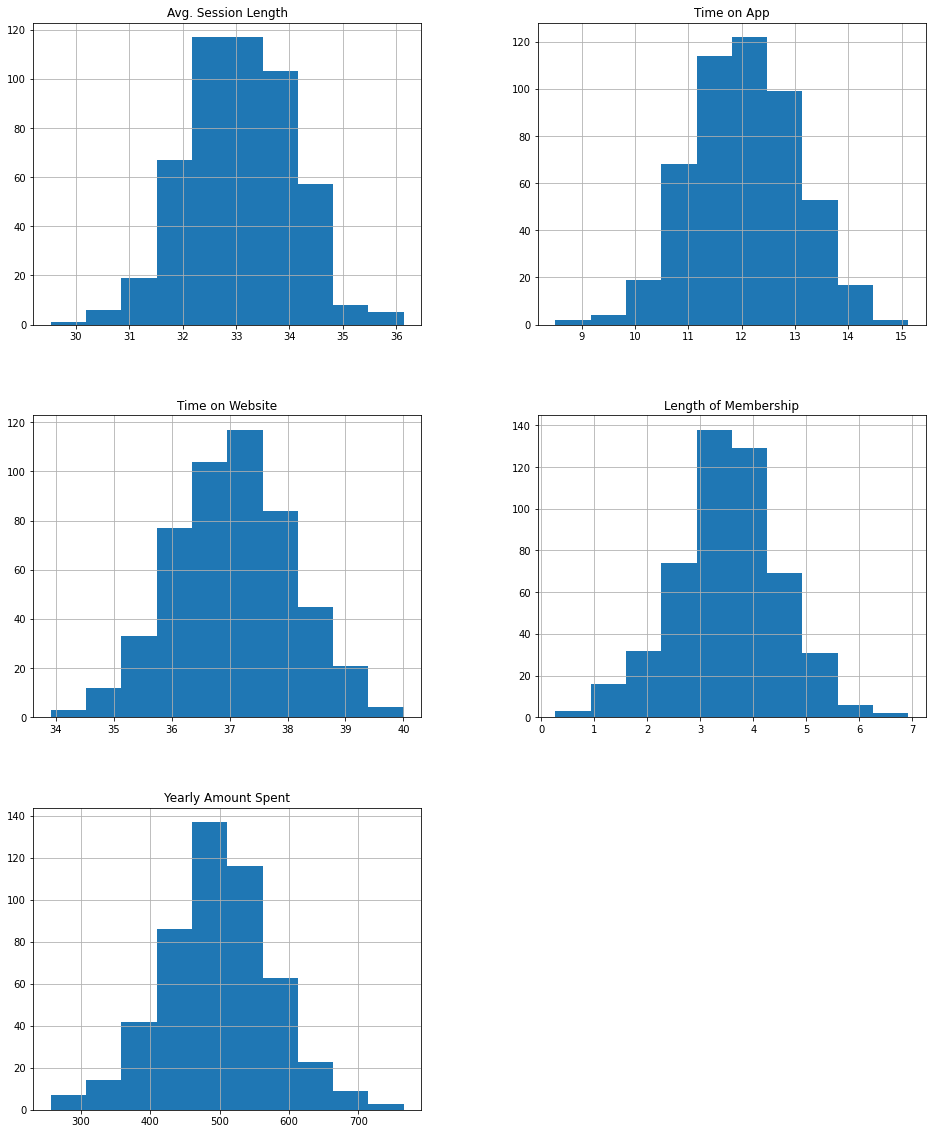

In [193]:
Customers.hist(bins=10,figsize=(16,20))
plt.show

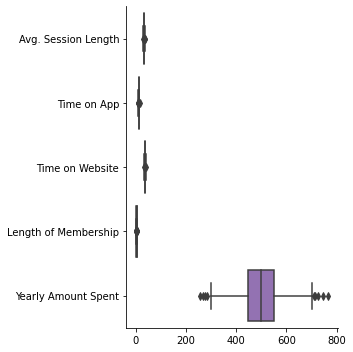

In [194]:
sns.catplot(data=Customers, orient="h",kind="box");

Text(0, 0.5, 'Yearly Amount Spent')

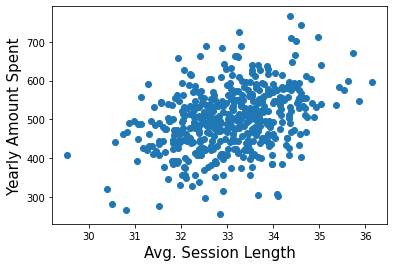

In [195]:
plt.scatter(x="Avg. Session Length",y="Yearly Amount Spent",data=Customers)
plt.xlabel("Avg. Session Length",fontdict={'fontsize':15,'fontweight':3,'color':'black'})
plt.ylabel("Yearly Amount Spent",fontdict={'fontsize':15,'fontweight':3,'color':'black'})

Text(0, 0.5, 'Yearly Amount Spent')

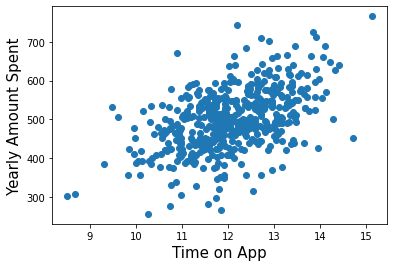

In [196]:
plt.scatter(x="Time on App",y="Yearly Amount Spent",data=Customers)
plt.xlabel("Time on App",fontdict={'fontsize':15,'fontweight':3,'color':'black'})
plt.ylabel("Yearly Amount Spent",fontdict={'fontsize':15,'fontweight':3,'color':'black'})

Text(0, 0.5, 'Yearly Amount Spent')

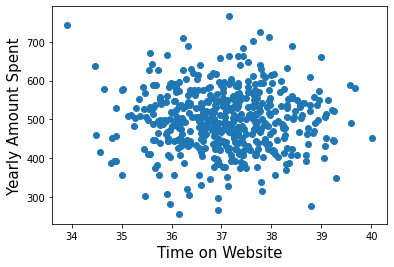

In [197]:
plt.scatter(x="Time on Website",y="Yearly Amount Spent",data=Customers)
plt.xlabel("Time on Website",fontdict={'fontsize':15,'fontweight':3,'color':'black'})
plt.ylabel("Yearly Amount Spent",fontdict={'fontsize':15,'fontweight':3,'color':'black'})

Text(0, 0.5, 'Yearly Amount Spent')

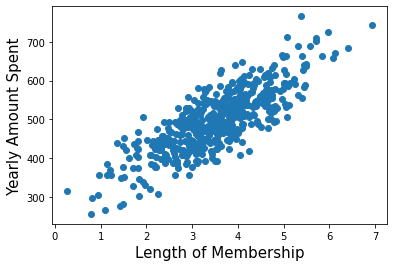

In [198]:
plt.scatter(x="Length of Membership",y="Yearly Amount Spent",data=Customers)
plt.xlabel("Length of Membership",fontdict={'fontsize':15,'fontweight':3,'color':'black'})
plt.ylabel("Yearly Amount Spent",fontdict={'fontsize':15,'fontweight':3,'color':'black'})

There is more linear relationship between input feature Length of Membership and Yearly Amount spend

Correlation:

Correlation is a statistical measure. Data correlation is a way to understand the relationship between multiple values or features in your dataset.

We can check how each feature is related to others using corr() function.



In [199]:
Customers.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<AxesSubplot:>

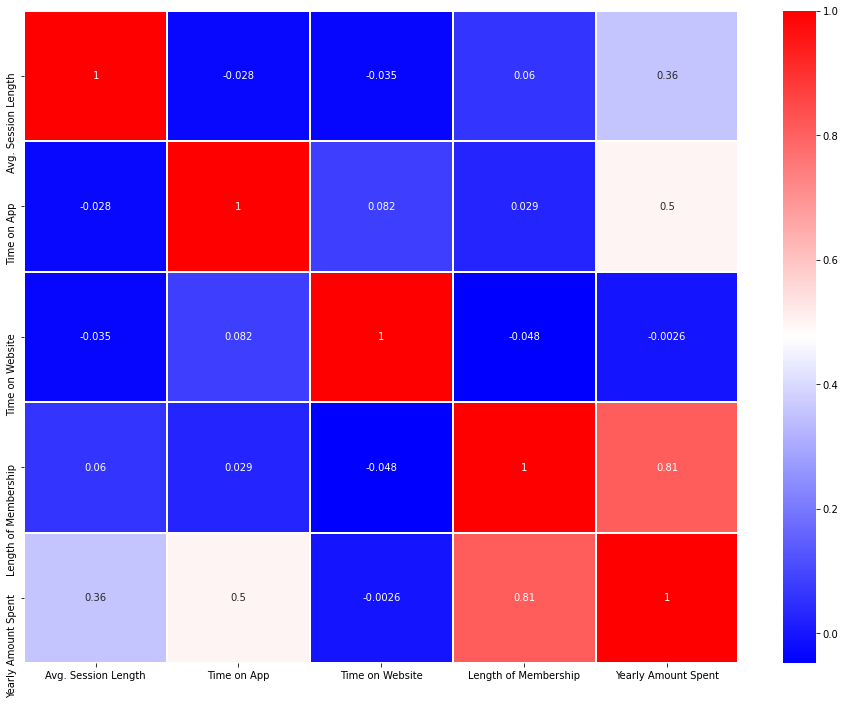

In [200]:
# Correlation Heatmap to fine out highly correlated columns
plt.figure(figsize=(16,12))
sns.heatmap(Customers.corr(),cmap='bwr',annot=True,linewidths=2)

The pair plot builds on two basic figures: The histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship  between two variables.

It plots every numerical attribute against every other.

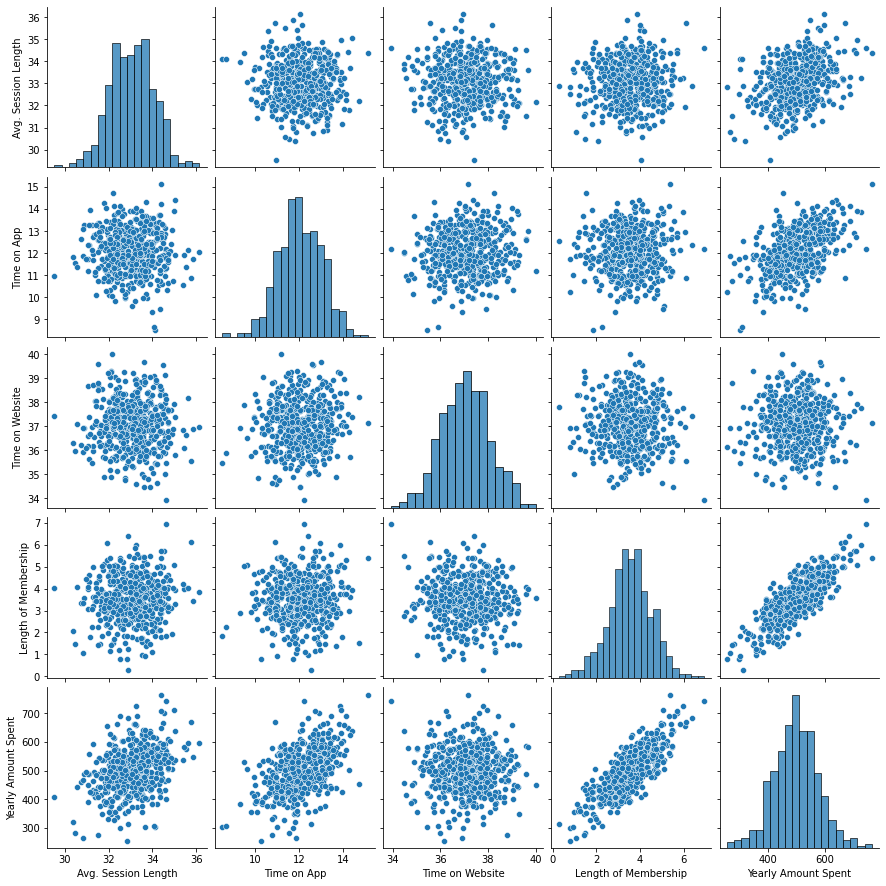

In [201]:
sns.pairplot(Customers)

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Count'>

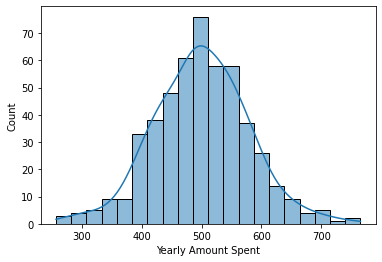

In [202]:
sns.histplot(x="Yearly Amount Spent",data=Customers,kde=True)

<AxesSubplot:ylabel='Count'>

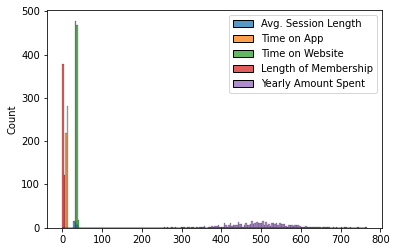

In [203]:
sns.histplot(Customers)

<AxesSubplot:ylabel='Yearly Amount Spent'>

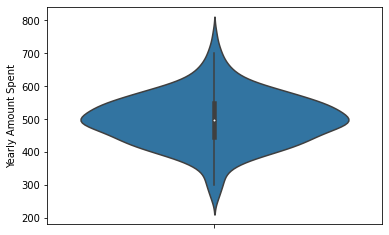

In [204]:
sns.violinplot(data=Customers,y=Customers['Yearly Amount Spent'])

<AxesSubplot:ylabel='Yearly Amount Spent'>

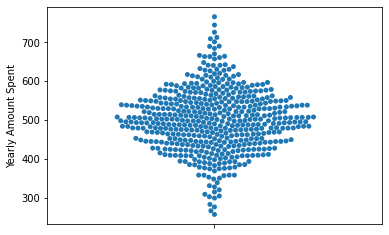

In [205]:
sns.swarmplot(data=Customers,y=Customers['Yearly Amount Spent'])

Creating Swarmplot inside the Violinplot to see Yearly Amount Spent columns.

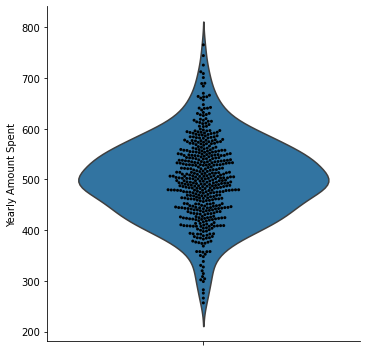

In [206]:
g=sns.catplot(data=Customers,kind="violin", inner=None,y=Customers['Yearly Amount Spent'])
sns.swarmplot(y=Customers['Yearly Amount Spent'], color="k", size=3, data=Customers, ax=g.ax);

<AxesSubplot:title={'center':'boxplot'}>

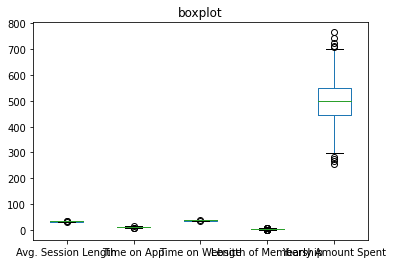

In [207]:
Customers.plot(kind='box', title='boxplot')

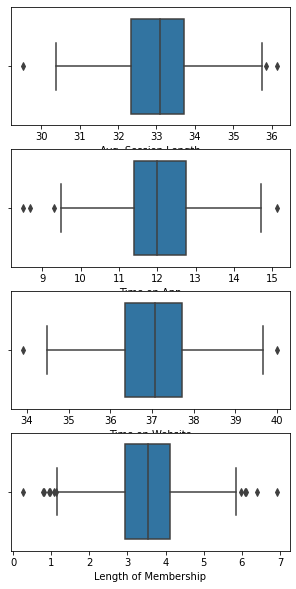

In [208]:
fig,axes=plt.subplots(4,figsize=(5,10))
plt1=sns.boxplot(Customers["Avg. Session Length"],ax=axes[0])
plt2=sns.boxplot(Customers["Time on App"],ax=axes[1])
plt3=sns.boxplot(Customers["Time on Website"],ax=axes[2])
plt4=sns.boxplot(Customers["Length of Membership"],ax=axes[3])

In [209]:
data1=Customers.iloc[:,3:]

In [210]:
def outlier_removal(data1,col):
    plt.figure(figsize=(20,20))
    fig,axes=plt.subplots(ncols=1,nrows=2,figsize=(12,4))
    sns.boxplot(data=data1,x=col,ax=axes[0]).set_title("Before Outlier removal"+col)
    lower_limit=data1[col].quantile(0.10)
    upper_limit=data1[col].quantile(0.90)
    a=[]
    for x in data1[col]:
        if x<lower_limit:
            x=lower_limit
            a.append(x)
        elif x>upper_limit:
            x=upper_limit
            a.append(x)
        else:
            x=x
            a.append(x)
    data1[col]=a
    sns.boxplot(data=data1,x=col,ax=axes[1],color='pink').set_title("After Outlier Removal"+col)
    plt.show()
    return Customers

<Figure size 1440x1440 with 0 Axes>

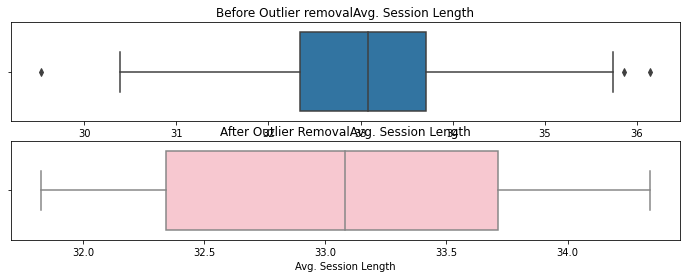

<Figure size 1440x1440 with 0 Axes>

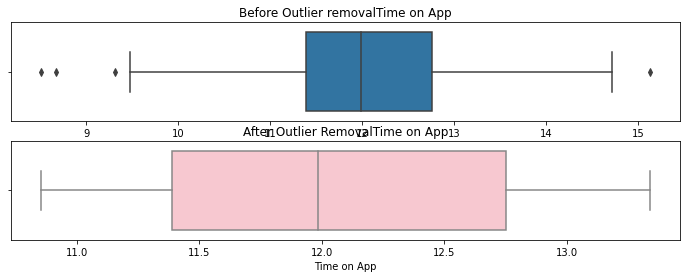

<Figure size 1440x1440 with 0 Axes>

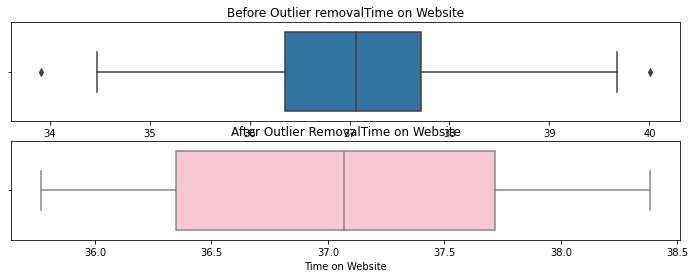

<Figure size 1440x1440 with 0 Axes>

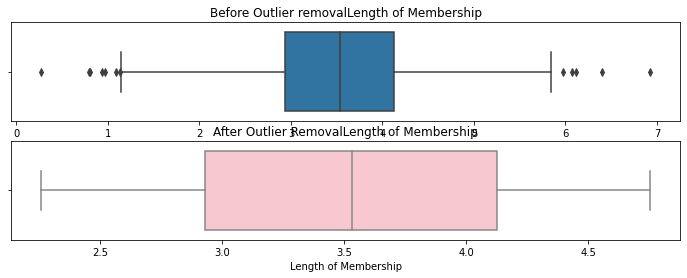

<Figure size 1440x1440 with 0 Axes>

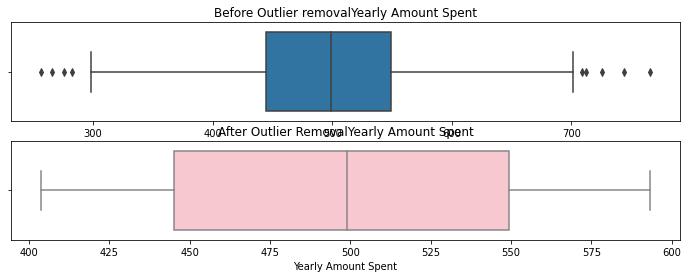

In [211]:
for col in data1.columns:
    Customers=outlier_removal(data1,col)
plt.show()


# Checking Assumptions

In [212]:
# Checking Assumptions for Linear Regression model
# Linearity
# No Multicolliearity
# Normality of Residuals
# Normal distribution of errors

#Linearity

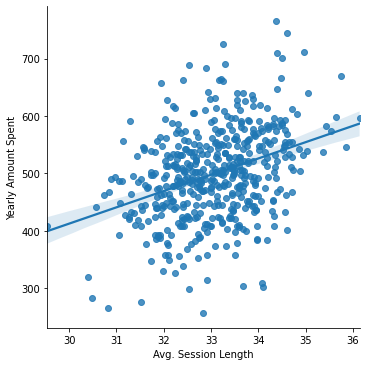

In [213]:
sns.lmplot(x="Avg. Session Length",y="Yearly Amount Spent",data=Customers)

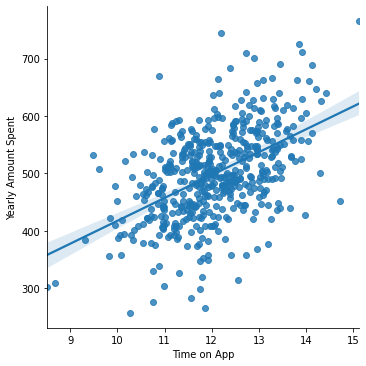

In [214]:
sns.lmplot(x="Time on App",y="Yearly Amount Spent",data=Customers)

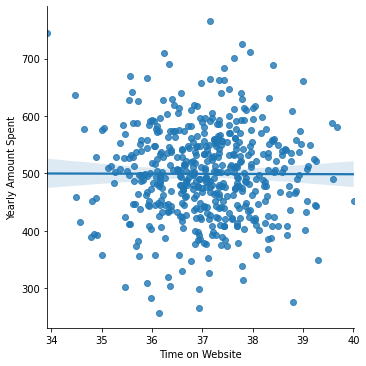

In [215]:
sns.lmplot(x="Time on Website",y="Yearly Amount Spent",data=Customers)

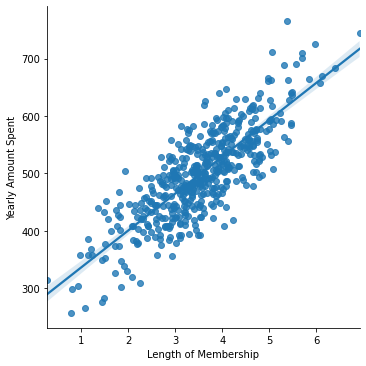

In [216]:
sns.lmplot(x="Length of Membership",y="Yearly Amount Spent",data=Customers)

#All features much follows linearity assumption
#No Multicolliearity

Creating a regplot to compare the Time on Website and Yearly Amount Spent columns.

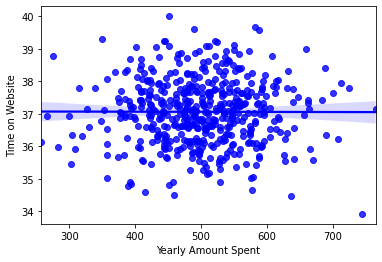

In [217]:
sns.regplot(x="Yearly Amount Spent", y="Time on Website",color = 'b', data=Customers);

Creating a jointplot to compare the Time on App and Yearly Amount Spent columns.

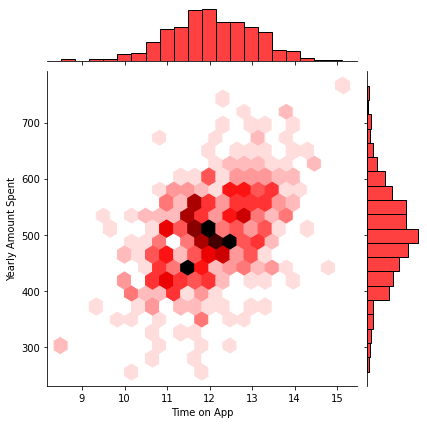

In [218]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',color= 'r',data=Customers,kind='hex')

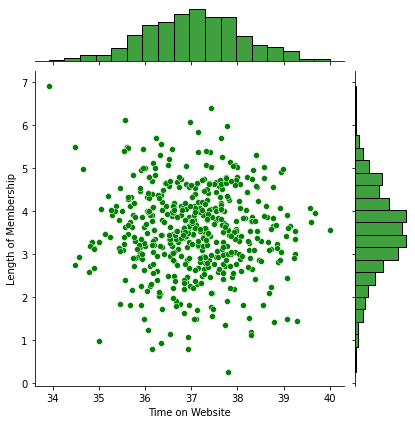

In [219]:
sns.jointplot(x='Time on Website',y='Length of Membership',color= 'g',data=Customers)

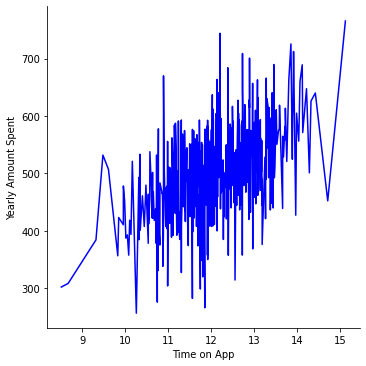

In [220]:

sns.relplot(x='Time on App',y='Yearly Amount Spent',data=Customers,color='blue',kind="line");

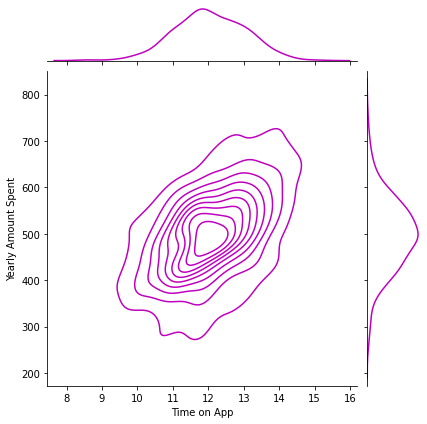

In [221]:
#Kernel Density Estimation
sns.jointplot(x="Time on App", y="Yearly Amount Spent", data=Customers, kind="kde",color='m');

# Train & Test Split

In [222]:
X = Customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
Y= Customers[['Yearly Amount Spent']]

In [223]:
print(X)

     Avg. Session Length  Time on App  Time on Website  Length of Membership
0              34.497268    12.655651        39.577668              4.082621
1              31.926272    11.109461        37.268959              2.664034
2              33.000915    11.330278        37.110597              4.104543
3              34.305557    13.717514        36.721283              3.120179
4              33.330673    12.795189        37.536653              4.446308
..                   ...          ...              ...                   ...
495            33.237660    13.566160        36.417985              3.746573
496            34.702529    11.695736        37.190268              3.576526
497            32.646777    11.499409        38.332576              4.958264
498            33.322501    12.391423        36.840086              2.336485
499            33.715981    12.418808        35.771016              2.735160

[500 rows x 4 columns]


In [224]:
print(Y)

     Yearly Amount Spent
0             587.951054
1             392.204933
2             487.547505
3             581.852344
4             599.406092
..                   ...
495           573.847438
496           529.049004
497           551.620145
498           456.469510
499           497.778642

[500 rows x 1 columns]


In [225]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [226]:
print(Y.shape, Y_train.shape, Y_test.shape)

(500, 1) (375, 1) (125, 1)


In [227]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1)
#test_size --> to specify the percentage of test data needed..

In [228]:
print(Y.shape, Y_train.shape, Y_test.shape)

(500, 1) (450, 1) (50, 1)


In [229]:
print(Y.mean(), Y_train.mean(), Y_test.mean())

Yearly Amount Spent    499.314038
dtype: float64 Yearly Amount Spent    498.264614
dtype: float64 Yearly Amount Spent    508.75886
dtype: float64


In [230]:
print(X_train.mean(), X_test.mean(), X.mean())

Avg. Session Length     33.058550
Time on App             12.053994
Time on Website         37.058071
Length of Membership     3.514918
dtype: float64 Avg. Session Length     33.004983
Time on App             12.038934
Time on Website         37.081811
Length of Membership     3.700357
dtype: float64 Avg. Session Length     33.053194
Time on App             12.052488
Time on Website         37.060445
Length of Membership     3.533462
dtype: float64


In [231]:
print(X_train)

     Avg. Session Length  Time on App  Time on Website  Length of Membership
54             34.390164    12.645195        38.468321              2.874597
389            34.195508    12.664193        37.027150              4.330407
265            33.902718    11.668867        37.341266              4.256983
86             33.877779    12.517666        37.151921              2.669942
319            33.419067    13.391120        37.194191              4.069917
..                   ...          ...              ...                   ...
113            32.653181    11.602532        37.309689              2.789462
62             32.227299    13.728627        37.997028              4.802631
199            30.836433    13.100110        35.907721              3.361613
218            32.530829    12.354607        37.122345              2.307552
348            31.812483    10.886921        34.897828              3.128639

[450 rows x 4 columns]


# Linear Regression Model

In [232]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,Y_train)
y_pred = reg.predict(X_test)

In [233]:
print(y_pred)

[[381.52582164]
 [456.96353043]
 [432.23816539]
 [551.13662047]
 [531.78880294]
 [523.61718716]
 [488.34665241]
 [512.56505111]
 [641.97110168]
 [555.33051489]
 [478.7802682 ]
 [506.08164484]
 [476.52086888]
 [502.31951994]
 [497.61216458]
 [494.49874827]
 [505.56691784]
 [633.90293066]
 [445.62157633]
 [547.94835221]
 [395.64770514]
 [572.0771093 ]
 [518.34445592]
 [671.27950408]
 [306.11007866]
 [503.66494796]
 [605.79401194]
 [489.34916345]
 [535.02268508]
 [532.2851832 ]
 [531.15518981]
 [615.6245267 ]
 [505.29914974]
 [422.73439856]
 [435.63672384]
 [662.60402208]
 [552.72072043]
 [520.47080013]
 [567.42357752]
 [411.51443994]
 [445.46715592]
 [506.52557966]
 [456.88763176]
 [499.81057685]
 [539.43821645]
 [527.59559315]
 [579.8492281 ]
 [411.96522576]
 [399.00830943]
 [500.07175325]]


In [234]:
# Normality of Residuals
residual=Y_test-y_pred
residual

,Yearly Amount Spent
237,-5.188921
132,-4.336275
329,12.824020
390,-4.579954
40,0.962985
363,4.165809
99,6.952790
494,-1.903259
114,0.130477
497,-3.710369


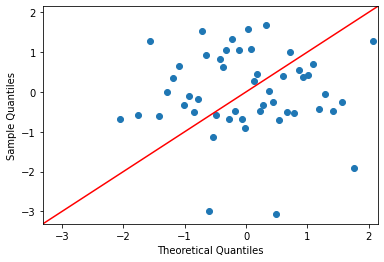

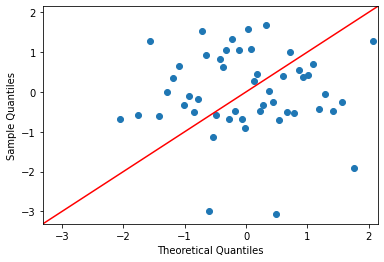

In [235]:
sm.qqplot(residual, line= '45', dist= stats.norm, fit=1)

All asuumptions are satisfied. Regression model fit for this data

# Results and Performance Metrics

In [236]:
from sklearn.metrics import r2_score
#Checking the R squraed error on test data
r2_score(Y_test,y_pred)



0.9843426818144183

In [237]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(Y_test, y_pred)))
print('MSE: {}'.format(metrics.mean_squared_error(Y_test, y_pred)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(Y_test, y_pred))))

MAE: 7.171368987403334
MSE: 86.92496637414402
RMSE: 9.323355960926516


In [238]:
# Storing the independent features error on test data
P_X = X

from sklearn.preprocessing import PolynomialFeatures
#Changing the data to 1 3rd degree polynomial
pol = PolynomialFeatures(degree = 3)
P_X=pol.fit_transform(X)
P_X

array([[1.00000000e+00, 3.44972677e+01, 1.26556511e+01, ...,
        6.39498351e+03, 6.59672308e+02, 6.80482684e+01],
       [1.00000000e+00, 3.19262720e+01, 1.11094607e+01, ...,
        3.70027766e+03, 2.64500713e+02, 1.89068587e+01],
       [1.00000000e+00, 3.30009148e+01, 1.13302781e+01, ...,
        5.65276230e+03, 6.25212437e+02, 6.91503677e+01],
       ...,
       [1.00000000e+00, 3.26467767e+01, 1.14994091e+01, ...,
        7.28560642e+03, 9.42382875e+02, 1.21895891e+02],
       [1.00000000e+00, 3.33225011e+01, 1.23914230e+01, ...,
        3.17105810e+03, 2.01115945e+02, 1.27552451e+01],
       [1.00000000e+00, 3.37159809e+01, 1.24188083e+01, ...,
        3.49981609e+03, 2.67606473e+02, 2.04619964e+01]])

In [239]:
# Trainig the model similarly but with 3rd degree polynomail of x this time
X_train, X_test, Y_train, Y_test = train_test_split(P_X,Y,random_state = 1,test_size=0.15)
reg = LinearRegression().fit(X_train,Y_train)
y_pred = reg.predict(X_test)
r2_score(Y_test,y_pred)

0.9869596641440541

In [240]:
# across validating the score to check and avoid overfitting
from sklearn.model_selection import cross_val_score
c = cross_val_score(reg, P_X, Y,cv=4)
c

array([0.98130645, 0.98239633, 0.9841823 , 0.97622424])

In [241]:
#Final Mean Accuracy
print("Mean accuracy after cross validation is :",c.mean()*100 , end = "%")

Mean accuracy after cross validation is : 98.10273304204283%

<AxesSubplot:ylabel='Count'>

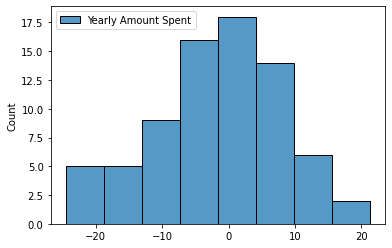

In [242]:
sns.histplot((Y_test-y_pred))

Text(0, 0.5, 'Actual_values')

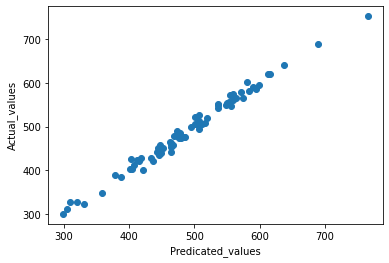

In [243]:
plt.scatter(Y_test,y_pred)
plt.xlabel("Predicated_values")
plt.ylabel("Actual_values")

# lasso Regression

In [244]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

lasso=Lasso()

In [245]:
parameters={'alpha':np.arange(0.01, 2, 0.01)}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=12)
lassocv.fit(X_train,Y_train)

GridSearchCV(cv=12, estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0...
       1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42, 1.43,
       1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53, 1.54,
       1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64, 1.65,
       1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76,
       1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87,
       1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97, 1.98,
       1.99])},
             scoring='neg_mean_squared_error')

In [246]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 0.01}
-109.13403491032727


In [247]:
lasso_pred=lassocv.predict(X_test)

In [248]:
score=r2_score(lasso_pred,Y_test)
score
     

0.9883014587628808

# Ridge Regression

In [249]:
ridge_regressor=Ridge()

In [250]:
parameters={'alpha':np.arange(0.01, 3, 0.01)}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=12)
ridgecv.fit(X_train,Y_train)

GridSearchCV(cv=12, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0...
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])},
             scoring='neg_mean_squared_error')

In [251]:
print(ridgecv.best_params_)
print(ridgecv.best_score_)

{'alpha': 2.9899999999999998}
-112.89997733317074


In [252]:
ridge_pred=ridgecv.predict(X_test)
score=r2_score(ridge_pred,Y_test)
score
     

0.9877182427742544